# International Medical Volunteer Study

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
path = '/Users/shriyagupta/Documents/IMV_Study-Barnes'
os.chdir(path)

## Data Importing

In [26]:
# Import data from the CSV file
df = pd.read_excel('imv combined data 2 translated.xlsx')
#Setting Display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# Dropping row 2 in the dataframe as it does not provide relevant info
df.drop(0, inplace = True)
df = df.set_index('Survey #')
#Renaming the Columns
df.columns = ['Survey Language (Q4)', 'Primary Language (Q3)',
       'Country (Q1)', 'City (Q2)', 'International society membership (Q5)',
       'Medical Specialty (Q6)', 'Primary Clinic Setting (Q7)',
       'Work with IMV (Q9)', 'How Often (Q9b)', 'Experience Description (Q9c)',
       'Practice w/I Scope (Q9d)', 'Interest in IMV (Q8)', 'Capacity (Q10)',
       'Most Important Capacity (Q10b)', 'IMV Role (Q11)', 'Most Important Role (Q11b)',
       'IMV Specialty (Q12)', 'Most Important Specialty (Q12b)',
       'Clinical Setting (Q13)', 'Length of Stay (Q14)',
       'Most Important Length of Stay (Q14b)', 'Prep (Q17)', 'Advertise (Q16)',
       'Student Role (Q18)', 'Anything Else (Q15)']
df.head()

,Survey Language (Q4),Primary Language (Q3),Country (Q1),City (Q2),International society membership (Q5),Medical Specialty (Q6),Primary Clinic Setting (Q7),Work with IMV (Q9),How Often (Q9b),Experience Description (Q9c),Practice w/I Scope (Q9d),Interest in IMV (Q8),Capacity (Q10),Most Important Capacity (Q10b),IMV Role (Q11),Most Important Role (Q11b),IMV Specialty (Q12),Most Important Specialty (Q12b),Clinical Setting (Q13),Length of Stay (Q14),Most Important Length of Stay (Q14b),Prep (Q17),Advertise (Q16),Student Role (Q18),Anything Else (Q15)
Survey #,,,,,,,,,,,,,,,,,,,,,,,,,
1,E,Swahili,Tanzania,Dar es Salaam,Y,OBGYN,"ACA, REF, PRIV, NOT ENOUGH DOCS",Y,3,"Good, as they help with training students and ...","Y, However challenges do happen due to the dif...",4,"1, 2, 9",2,"D, N, A",D,OBGYN,OBGYN,"PUB, REMOTE","5, 6",5,"lang, cul, lic",Y,2,"Need to get prepared, know the setting and con..."
2,E,Mongolian,Mongolia,Ulaanbaatar,Y,OBGYN,ACA,N,N,NaN,blank,5,"1, 2, 4, 5, 6, 9, 10, other: midwife education",1,D,D,OBGYN,OBGYN,PUB,"2, 3",3,"cul, lic",Y,4,I would like to collaborate with you
3,E,Kiswahili,TANZANIA,DAR ES SALAAM,N,OBGYN,PRIV,Y,2,VERY HELPFUL AS I GAINED MUCH KNOWLEDGE AND SK...,Y,5,"2, 6, 10",10,D,D,OBGYN,OBGYN,REG REF,4,4,equip,Y,2,NO
4,E,"Kyrgyz, Russian",Kyrgyzstan,Bishkek,Y,OBGYN,"ACA, NOT ENOUGH DOCS, NOT ENOUGH RES",N,N,NaN,blank,4,"3, 6, 9",7,"D, N, E",E,"OBGYN, CC, ONC, EMS",OBGYN,UNIV,"2, 3, 4",2,equip,Y,3,Support of the State Private Partner
5,E,E,Tanzania,Dar es salaam,Y,OBGYN,"PRIV, PUB, URB, RUR, NOT ENOUGH DOCS, NOT ENOU...",Y,2,students especially junior ones were not usefu...,Y,4,"1, 6",1,"D, N, T, A",A,"OBGYN, CC, ANES",ANES,PUB,6,6,"cul, visa, lic",N,1,They must e clinically competent or a final ye...


## Data Processing and Dummy Coding 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


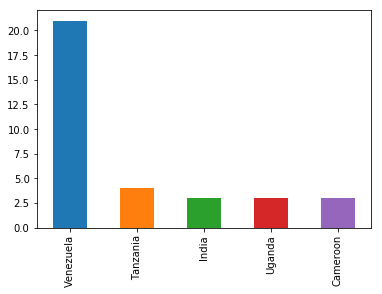

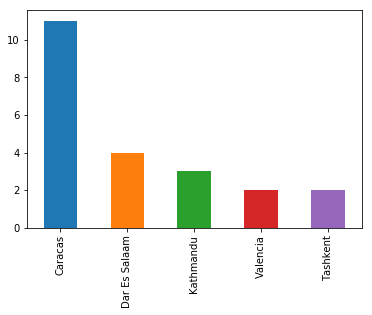

In [27]:
#Column B
df['Survey Language (Q4)'] = df['Survey Language (Q4)'].str.replace('E  ', 'E')

#Column C
df['Primary Language (Q3)']
lang = {'E':'English', 'A':'Arabic', 'F':'French', 'S':'Spanish'}
df['Primary Language (Q3)'] = df['Primary Language (Q3)'].replace({'E':'English', 'A':'Arabic', 'F':'French', 'S':'Spanish'})
df.ix[23,'Primary Language (Q3)'] = 'English, Amharic'
df.ix[99,'Primary Language (Q3)'] = 'French, Bissa'
df['Primary Language (Q3)']=df['Primary Language (Q3)'].str.title()

#Column D 
df['Country (Q1)']=df['Country (Q1)'].str.title()
df.loc[df['Country (Q1)'] == 'Verenzuela', ['Country (Q1)']] = 'Venezuela'
df.loc[df['Country (Q1)'] == 'Venezueka', ['Country (Q1)']] = 'Venezuela'
df.loc[df['Country (Q1)'] == 'Niger', ['Country (Q1)']] = 'Nigeria'
df.loc[df['Country (Q1)'] == 'Ug', ['Country (Q1)']] = 'Uganda'
df.loc[df['Country (Q1)'] == 'México', ['Country (Q1)']] = 'Mexico'
top_countries=df['Country (Q1)'].value_counts().head()
top_countries.plot.bar()
plt.show()

#Column E
df['City (Q2)']=df['City (Q2)'].str.title()
df.loc[df['City (Q2)'] == 'Medical Doctor', ['City (Q2)']] = np.nan
df.loc[df['City (Q2)'] == 'Obstetrician And Gynaecologist', ['City (Q2)']] = np.nan
top_cities=df['City (Q2)'].value_counts().head()
top_cities.plot.bar()
plt.show()

In [28]:
#Column G
df['Medical Specialty (Q6)'] = df['Medical Specialty (Q6)'].str.replace('\s+', '') 
df.loc[df['Medical Specialty (Q6)'] == 'GEN SURG, SURGSS (ORTHO) ', ['Medical Specialty (Q6)']] = 'GENSURG, SURGSS (ORTHO)' 
df['Medical Specialty (Q6)'].str.get_dummies(',')

#Column H
df['Primary Clinic Setting (Q7)'] = df['Primary Clinic Setting (Q7)'].str.replace('\s+', '') 
df['Primary Clinic Setting (Q7)'].str.get_dummies(',')

# Columns I-J-K-L
for index, row in df.iterrows():
    if row['Work with IMV (Q9)'] == 'N':
        row['How Often (Q9b)'] = np.nan
        row['Experience Description (Q9c)'] = np.nan
        row['Practice w/I Scope (Q9d)'] = np.nan
df['Practice w/I Scope (Q9d)'] = df["Practice w/I Scope (Q9d)"].fillna('')
j=0
new_col= []

#Separating Y and explanation for Q9(d)
for i in df['Practice w/I Scope (Q9d)'].str.split(','):
    new_col.append(i[0])
    if(len(i)>1):
        df.iloc[j]['Practice w/I Scope (Q9d)'] = i[1]
    else:
        df.iloc[j]['Practice w/I Scope (Q9d)'] = np.nan
    j = j+1  

#New Column added in the dataset
df['Practice w/I Scope (Q9d)-Part2'] = new_col
check_list =['Y','N','??']
for index, row in df.iterrows():
    if row['Practice w/I Scope (Q9d)-Part2'] not in check_list :
        row["Practice w/I Scope (Q9d)-Part2"] = np.nan     

In [29]:
#ColumnN
df['Capacity (Q10)'] = df['Capacity (Q10)'].str.replace('\s+', '') 
df['Capacity (Q10)'].str.get_dummies(',')
df.loc[df['Capacity (Q10)'] == 'none', ['Capacity (Q10)']] = np.nan
df.loc[df['Capacity (Q10)'] == 'other', ['Capacity (Q10)']] = np.nan

#ColumnO
df['Most Important Capacity (Q10b)'] = df['Most Important Capacity (Q10b)'].str.replace('\s+', '') 
df['Most Important Capacity (Q10b)'].str.get_dummies(',')
df.loc[df['Most Important Capacity (Q10b)'] == 'none', ['Most Important Capacity (Q10b)']] = np.nan

#ColumnP
df['IMV Role (Q11)'] = df['IMV Role (Q11)'].str.replace('\s+', '') 
df['IMV Role (Q11)'].str.get_dummies(',')
df.loc[df['IMV Role (Q11)'] == 'NO', ['IMV Role (Q11)']] = ''
df.loc[df['IMV Role (Q11)'] == 'OTHER(MIDWIVES)', ['IMV Role (Q11)']] = ''
df.loc[df['IMV Role (Q11)'] == 'OTHER:ANY', ['IMV Role (Q11)']] = ''
df.loc[df['IMV Role (Q11)'] == 'OTHER:POLICY-MAKING', ['IMV Role (Q11)']] = ''
df.loc[df['IMV Role (Q11)'] == 'OTHER:RESEARCH', ['IMV Role (Q11)']] = ''
df.loc[df['IMV Role (Q11)'] == 'RESEARCH', ['IMV Role (Q11)']] = ''

#ColumnQ
df['Most Important Role (Q11b)'] = df['Most Important Role (Q11b)'].str.replace('\s+', '') 
df['Most Important Role (Q11b)'].str.get_dummies(',')
df.loc[df['Most Important Role (Q11b)'] == 'OTHER(RESEARCH)', ['Most Important Role (Q11b)']] = ''
df.loc[df['Most Important Role (Q11b)'] == 'OTHER:ANY', ['Most Important Role (Q11b)']] = ''
df.loc[df['Most Important Role (Q11b)'] == 'OTHER:POLICY-MAKING', ['Most Important Role (Q11b)']] = ''
df.loc[df['Most Important Role (Q11b)'] == 'RESEARCH', ['Most Important Role (Q11b)']] = ''
df.loc[df['Most Important Role (Q11b)'] == 'TECHNICIAN', ['Most Important Role (Q11b)']] = 'C'

#Column R
df['IMV Specialty (Q12)'] = df['IMV Specialty (Q12)'].str.replace('\s+', '')
df['IMV Specialty (Q12)'].str.get_dummies(',')
df.loc[df['IMV Specialty (Q12)'] == 'MEN(ADULTS)', ['Most Important Role (Q11b)']] = 'MEN(ADULT)'
df.loc[df['IMV Specialty (Q12)'] == 'ORTO', ['Most Important Role (Q11b)']] = 'ORTHO'

#Column S
df['Most Important Specialty (Q12b)'] = df['Most Important Specialty (Q12b)'].str.replace('\s+', '')
df['Most Important Specialty (Q12b)'].str.get_dummies(',')

#Column T
df['Clinical Setting (Q13)'] = df['Clinical Setting (Q13)'].str.replace('\s+', '')
df['Clinical Setting (Q13)'].str.get_dummies(',')
df.loc[df['Clinical Setting (Q13)'] == 'UNIVE', ['Clinical Setting (Q13)']] = 'UNIV'

#Column U
df['Length of Stay (Q14)'] = df['Length of Stay (Q14)'].str.replace('\s+', '')
df['Length of Stay (Q14)'].str.get_dummies(',')

#Column W
df['Prep (Q17)'] = df['Prep (Q17)'].str.replace('\s+', '')
df['Prep (Q17)'].str.get_dummies(',')
df.loc[df['Prep (Q17)'] == 'other:Befamiliarwithourproblems', ['Prep (Q17)']] = 'Other'
df.loc[df['Prep (Q17)'] == 'other:Speaktopeopleatthehospitalorinthefield', ['Prep (Q17)']] = 'Other'
df.loc[df['Prep (Q17)'] == 'other:developlearnersattitude', ['Prep (Q17)']] = 'Other'
df.loc[df['Prep (Q17)'] == 'other:funding', ['Prep (Q17)']] = 'Other'
df.loc[df['Prep (Q17)'] == 'other:havefinancialresources', ['Prep (Q17)']] = 'Other'
df.loc[df['Prep (Q17)'] == 'other:none', ['Prep (Q17)']] = 'Other'
df.loc[df['Prep (Q17)'] == 'other:vaccinations', ['Prep (Q17)']] = 'Other'
df.loc[df['Prep (Q17)'] == 'other:partnerwithagencywithexperience', ['Prep (Q17)']] = 'Other'

In [30]:
df.head()

,Survey Language (Q4),Primary Language (Q3),Country (Q1),City (Q2),International society membership (Q5),Medical Specialty (Q6),Primary Clinic Setting (Q7),Work with IMV (Q9),How Often (Q9b),Experience Description (Q9c),Practice w/I Scope (Q9d),Interest in IMV (Q8),Capacity (Q10),Most Important Capacity (Q10b),IMV Role (Q11),Most Important Role (Q11b),IMV Specialty (Q12),Most Important Specialty (Q12b),Clinical Setting (Q13),Length of Stay (Q14),Most Important Length of Stay (Q14b),Prep (Q17),Advertise (Q16),Student Role (Q18),Anything Else (Q15),Practice w/I Scope (Q9d)-Part2
Survey #,,,,,,,,,,,,,,,,,,,,,,,,,,
1,E,Swahili,Tanzania,Dar Es Salaam,Y,OBGYN,"ACA,REF,PRIV,NOTENOUGHDOCS",Y,3,"Good, as they help with training students and ...",However challenges do happen due to the diffe...,4,"1,2,9",NaN,"D,N,A",D,OBGYN,OBGYN,"PUB,REMOTE","5,6",5,"lang,cul,lic",Y,2,"Need to get prepared, know the setting and con...",Y
2,E,Mongolian,Mongolia,Ulaanbaatar,Y,OBGYN,ACA,N,NaN,NaN,NaN,5,"1,2,4,5,6,9,10,other:midwifeeducation",NaN,D,D,OBGYN,OBGYN,PUB,"2,3",3,"cul,lic",Y,4,I would like to collaborate with you,NaN
3,E,Kiswahili,Tanzania,Dar Es Salaam,N,OBGYN,PRIV,Y,2,VERY HELPFUL AS I GAINED MUCH KNOWLEDGE AND SK...,NaN,5,"2,6,10",NaN,D,D,OBGYN,OBGYN,REGREF,NaN,4,equip,Y,2,NO,Y
4,E,"Kyrgyz, Russian",Kyrgyzstan,Bishkek,Y,OBGYN,"ACA,NOTENOUGHDOCS,NOTENOUGHRES",N,NaN,NaN,NaN,4,"3,6,9",NaN,"D,N,E",E,"OBGYN,CC,ONC,EMS",OBGYN,UNIV,"2,3,4",2,equip,Y,3,Support of the State Private Partner,NaN
5,E,English,Tanzania,Dar Es Salaam,Y,OBGYN,"PRIV,PUB,URB,RUR,NOTENOUGHDOCS,NOTENOUGHRES",Y,2,students especially junior ones were not usefu...,NaN,4,"1,6",NaN,"D,N,T,A",A,"OBGYN,CC,ANES",ANES,PUB,NaN,6,"cul,visa,lic",N,1,They must e clinically competent or a final ye...,Y


In [31]:
#Writing the output to csv file
df.to_csv('IMV_CleanData.csv')